In [28]:
import matplotlib
import matplotlib.font_manager as fm

matplotlib.use('Agg')
#matplotlib.rc('font', family="D2Coding")
# [f.fname for f in matplotlib.font_manager.fontManager.ttflist]
font_location = 'C:\\Users\\62190\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf' # ex - 또는 ./utils/NanumBarunGothic.ttf
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family = font_name)

In [77]:
# 경고 무시
import warnings
warnings.simplefilter('ignore')

# 자주 사용하는 패키지를 임포트
import matplotlib as mpl
import matplotlib.font_manager as fm

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import pgmpy
import scipy.stats


# matplotlib 설정
mpl.use('Agg')

# seaborn 설정
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [53]:
sale_t = pd.read_csv("datas/sales_total.csv", encoding="ANSI")
sale_t

,Item,Count,Total_View,Total_Amount,Tot_Am_Stand,Total_EA,Mom_Code,Item_Code,Item_Group,Price
0,한일 대용량 스텐 분쇄믹서기,401,8020,18167996000,9.241823,165464,100255,200868,주방,109800
1,안동간고등어 20팩,318,6360,14391949000,7.225970,465759,100253,200864,농수축,30900
2,일시불 LG전자 매직스페이스 냉장고,308,6180,10904495000,5.364184,7938,100155,200554,가전,1409000
3,무이자 LG전자 매직스페이스 냉장고,308,6180,9279239000,4.496537,6132,100155,200487,가전,1549000
4,일시불 LG 울트라HD TV 65UK6800HNC,295,5940,6230040000,2.868714,3573,100148,200508,가전,1900000
...,...,...,...,...,...,...,...,...,...,...
358,스위스밀리터리 전동공구세트,2,60,83659000,-0.412548,606,100433,201346,생활용품,138000
359,쿠미투니카 하이서포트 심리스 란쥬&팬티,2,60,63618000,-0.423247,796,100445,202281,속옷,79900
360,헤스떼벨 웜 업 란쥬쉐이퍼,2,60,39341000,-0.436207,773,100124,200332,속옷,50900
361,마스케라 밍크니팅모자세트,2,60,33805000,-0.439163,679,100678,202025,잡화,49800


## 가격 분포 그래프

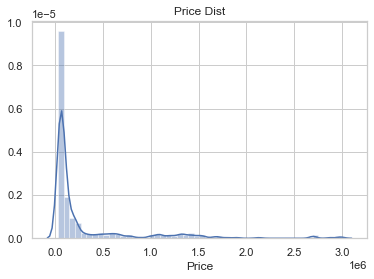

In [5]:
sns.distplot(sale_t.Price)
plt.title("Price Dist")
plt.show()

## 마더코드별 총 판매액

In [31]:
sale_t.groupby(sale_t.Mom_Code).Total_Amount.median()

Mom_Code
100001     151336000
100016      30530000
100022     595458000
100026    1650690000
100041     191295000
             ...    
100837     743436000
100839      15937000
100841    4528056000
100844    1272830000
100849    5777266000
Name: Total_Amount, Length: 180, dtype: int64

## 상품군별 총 판매액과 그래프

In [30]:
A = sale_t.groupby(sale_t.Item_Group).Total_Amount.median()
A

Item_Group
가구       65869000
가전      216916000
건강기능    167300000
농수축     498370500
생활용품    131003000
속옷      387246000
의류      236308500
이미용     123814000
잡화      222547000
주방      325707000
Name: Total_Amount, dtype: int64

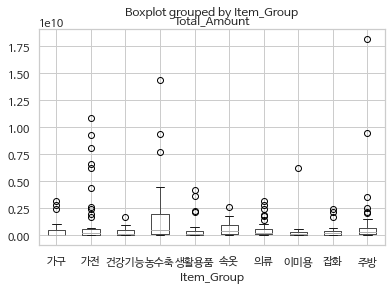

In [29]:
sale_t.boxplot("Total_Amount", "Item_Group")
plt.show()

## 상품군별 판매량

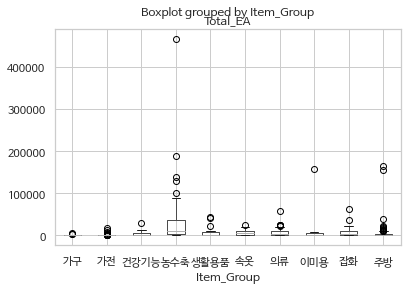

In [32]:
sale_t.boxplot("Total_EA", "Item_Group")
plt.show()

## 변수의 분포

In [36]:
sale_t.describe().iloc[:]

,Count,Total_View,Total_Amount,Total_EA,Mom_Code,Item_Code,Price
count,363.000000,363.000000,3.630000e+02,363.000000,363.000000,363.000000,3.630000e+02
mean,37.815427,766.608815,8.564339e+08,10604.595041,100463.663912,201439.743802,3.075413e+05
std,58.830749,1177.295588,1.873176e+09,32978.672875,244.480038,704.187120,5.270562e+05
min,2.000000,56.000000,1.500000e+05,0.000000,100001.000000,200001.000000,2.980000e+04
25%,6.000000,120.000000,7.372950e+07,607.500000,100242.000000,200849.500000,5.140000e+04
50%,16.000000,356.000000,2.419390e+08,2669.000000,100491.000000,201510.000000,7.990000e+04
75%,40.000000,828.500000,7.593505e+08,8289.500000,100672.000000,202071.500000,2.085000e+05
max,401.000000,8020.000000,1.816800e+10,465759.000000,100849.000000,202512.000000,2.990000e+06


## 회귀분석

In [33]:
# 모든 변수
model = sm.OLS.from_formula("Total_Amount ~ C(Item_Group) + Total_View + Total_EA + Price + 0", sale_t)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:           Total_Amount   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 17 Aug 2020   Prob (F-statistic):          1.22e-134
Time:                        12:50:58   Log-Likelihood:                -7924.1
No. Observations:                 363   AIC:                         1.587e+04
Df Residuals:                     350   BIC:                         1.592e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(Item_Group)[가구]     7.77e+07   2

In [37]:
# 변수 제거
model = sm.OLS.from_formula("Total_Amount ~ Total_View + Total_EA + Price + 0", sale_t)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           Total_Amount   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              799.6
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                   9.02e-159
Time:                        12:53:34   Log-Likelihood:                         -7929.9
No. Observations:                 363   AIC:                                  1.587e+04
Df Residuals:                     360   BIC:                                  1.588e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 회귀분석(2)
- 총 판매량과 노출시간은 관련이 있을까?

In [38]:
model = sm.OLS.from_formula("Total_Amount ~ Total_View + 0", sale_t)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           Total_Amount   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.723
Method:                 Least Squares   F-statistic:                              948.1
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                   3.83e-103
Time:                        12:54:34   Log-Likelihood:                         -8066.0
No. Observations:                 363   AIC:                                  1.613e+04
Df Residuals:                     362   BIC:                                  1.614e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- 아주 관련이 크다

In [54]:
model = sm.OLS.from_formula("Total_Amount ~ Total_EA + 0", sale_t)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:           Total_Amount   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.592
Method:                 Least Squares   F-statistic:                              528.4
Date:                Mon, 17 Aug 2020   Prob (F-statistic):                    9.67e-73
Time:                        13:44:03   Log-Likelihood:                         -8136.1
No. Observations:                 363   AIC:                                  1.627e+04
Df Residuals:                     362   BIC:                                  1.628e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- 총 판매 갯수와 총 취급액은 서로 충분한 설명력이있다.

## 추천시스템

In [79]:
import surprise
from sklearn.decomposition import TruncatedSVD

In [86]:
sale_t = pd.read_csv("datas/sales_total.csv", encoding="ANSI")
sale_ts = pd.DataFrame(sale_t)
del sale_ts["Item"]
del sale_ts["Count"]
del sale_ts["Total_View"]
del sale_ts["Total_Amount"]
del sale_ts["Tot_Am_Stand"]
del sale_ts["Total_EA"]
del sale_ts["Item_Group"]
del sale_ts["Price"]
sale_ts

,Tot_EA_Stand+1,Mom_Code,Item_Code
0,5.7,100255,200868
1,14.8,100253,200864
2,0.9,100155,200554
3,0.9,100155,200487
4,0.8,100148,200508
...,...,...,...
358,0.7,100433,201346
359,0.7,100445,202281
360,0.7,100124,200332
361,0.7,100678,202025


In [91]:
sale_t_table = sale_ts.set_index(["Mom_Code", "Item_Code"]).unstack().fillna(0)
sale_t_table.shape

(180, 363)

In [92]:
sale_t_table.iloc[10:20, 10:20]

Tot_EA_Stand+1                                                   \
Item_Code         200160 200191 200197 200218 200219 200235 200236 200242   
Mom_Code                                                                    
100080               0.0    0.0    0.0    0.0    1.3    0.0    0.0    0.0   
100081               0.0    0.0    0.0    1.1    0.0    0.0    0.0    0.0   
100088               0.0    0.0    0.0    0.0    0.0    1.4    5.4    0.0   
100089               0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.8   
100090               0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100097               0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100100               0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100101               0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100102               0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
100124               0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

                         
Item_Code 200243 200246  
Mom_Code                 
100080       0.0    0.0  
100081       0.0    0.0  
100088       0.0    0.0  
100089       0.0    0.8  
100090       0.9    0.0  
100097       0.0    0.0  
100100       0.0    0.0  
100101       0.0    0.0  
100102       0.0    0.0  
100124       0.0    0.0

In [94]:
SVD = TruncatedSVD(n_components=12)
sale_matrix = SVD.fit_transform(sale_t_table)
sale_matrix.shape

(180, 12)

In [95]:
sale_matrix[0]

array([-1.64313008e-15, -4.54966152e-13,  2.89382547e-12, -9.20825661e-12,
        1.26110659e-10, -8.92244733e-11,  2.11633364e-10, -2.54888146e-09,
        3.42729714e-09,  6.22448507e-08,  3.05891695e-08,  1.35823474e-07])

In [96]:
corr = np.corrcoef(sale_matrix)
corr.shape

(180, 180)

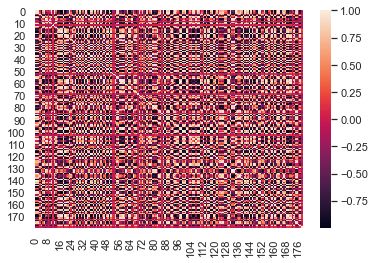

In [99]:
sns.heatmap(corr)